# Obdelava podatkov 2. del

In [3]:
import datetime
import csv
import pandas as pd
import numpy as np

In [4]:
column_names = [ 'Type A', 'Measure A', 'Units A',
                 'Type B', 'Measure B', 'Units B',
                 'Type C', 'Measure C', 'Units C', 
                 'Datetime']

In [5]:
path = 'data/DATA_rpi_data_long_R.csv'

#uvozimo podatke
df_redundant = pd.read_csv(path, names=column_names)

In [6]:
df_redundant.head()

,Type A,Measure A,Units A,Type B,Measure B,Units B,Type C,Measure C,Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


**Urejanje prikaza podatkov**



In [7]:
df_compact = df_redundant.copy() #da imamo stare podatke na voljo

In [8]:
map_dict = {'Measure A':'Ping (ms)', 'Measure B': 'Download (Mbit/s)', 'Measure C': 'Upload (Mbit/s)'}

In [9]:
#preimenuj - rename stolpce katere bomo uporabili, inpalce - na mestu
df_compact.rename(columns=map_dict, inplace=True)

In [10]:
df_compact.head()

,Type A,Ping (ms),Units A,Type B,Download (Mbit/s),Units B,Type C,Upload (Mbit/s),Units C,Datetime
0,Ping:,26.992,ms,Download:,91.80,Mbit/s,Upload:,14.31,Mbit/s,2016-11-24 13:36:25
1,Ping:,24.532,ms,Download:,88.19,Mbit/s,Upload:,14.12,Mbit/s,2016-11-24 13:36:55
2,Ping:,20.225,ms,Download:,59.86,Mbit/s,Upload:,14.11,Mbit/s,2016-11-24 13:37:25
3,Ping:,19.332,ms,Download:,91.81,Mbit/s,Upload:,14.22,Mbit/s,2016-11-24 13:37:57
4,Ping:,22.494,ms,Download:,92.05,Mbit/s,Upload:,14.08,Mbit/s,2016-11-24 13:38:27


In [11]:
drop_list = ['Type A', 'Type B', 'Type C', 'Units A', 'Units B', 'Units C']

In [12]:
#odstranimo nepotrebne stolpce
df_compact.drop(drop_list, axis=1, inplace=True)

In [13]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime
0,26.992,91.80,14.31,2016-11-24 13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27


In [14]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 4 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
dtypes: float64(1), object(3)
memory usage: 21.3+ KB


**Urejanje datuma in časa**



In [15]:
pd.to_datetime(df_compact['Datetime'][0])

Timestamp('2016-11-24 13:36:25')

In [16]:
type(pd.to_datetime(df_compact['Datetime'][0]))

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
pd.to_datetime(df_compact['Datetime'][0]).date()

datetime.date(2016, 11, 24)

In [18]:
#dodamo stolpec z datumi
df_compact['Date'] = pd.to_datetime(df_compact['Datetime']).dt.date

In [23]:
#isto kot zgoraj apply po celem df
df_compact['Date'] = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str).date())

In [24]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24


In [25]:
df_compact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 5 columns):
Ping (ms)            679 non-null object
Download (Mbit/s)    679 non-null object
Upload (Mbit/s)      673 non-null float64
Datetime             673 non-null object
Date                 673 non-null object
dtypes: float64(1), object(4)
memory usage: 26.6+ KB


In [26]:
pd.to_datetime(df_compact['Datetime'][0]).time()

datetime.time(13, 36, 25)

In [29]:
#dodamo stolpec time
type(pd.to_datetime(df_compact['Datetime'][0]).time())

datetime.time

In [30]:
df_compact['Time'] = pd.to_datetime(df_compact['Datetime']).dt.time

In [31]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27


In [32]:
#time dodamo isto kot zgoraj

temp = df_compact['Datetime'].apply(lambda dt_str: pd.to_datetime(dt_str))
df_compact['Time'] = temp.dt.time

In [33]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Datetime,Date,Time
0,26.992,91.80,14.31,2016-11-24 13:36:25,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24 13:36:55,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24 13:37:25,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24 13:37:57,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24 13:38:27,2016-11-24,13:38:27


In [34]:
#izbrišemo stolpec Datetime

df_compact.drop('Datetime', axis=1, inplace=True)

In [35]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [36]:
# tip datuma, časa
type(df_compact['Date'][0])

datetime.date

In [37]:
type(df_compact['Time'][0])

datetime.time

In [38]:
#shranimo nazaj v csv

df_compact.to_csv('data/OUT_rpi_data_compact.csv') # lahko že tu damo stran indekse indeks=False?

## Visualization


#### Clean and Analyze Data


**Čiščenje podatkov**



In [40]:
#preberemo nov file zgoraj shranjeno

df_compact = pd.read_csv('data/DATA_rpi_data_compact.csv')

In [41]:
df_compact.head() #pusti indekse

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [42]:
df_compact.drop('Unnamed: 0', axis=1, inplace=True)

In [43]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [44]:
NaNs_in_df = df_compact.isnull()

In [45]:
type(NaNs_in_df)

pandas.core.frame.DataFrame

In [46]:
NaNs_in_df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [48]:
NaNs_in_df.sum().sum() #dodali še en sum dobimo iz serijo dataframe in eno cifro

23

In [49]:
#v eni vrstici, enako kot zgoraj
df_compact.isnull().sum().sum()

23

In [52]:
NaNs_total = df_compact.isnull().sum().sum()

In [57]:
NaNs_pct = np.round(NaNs_total/float(len(df_compact.columns) * len(df_compact))*100, decimals=4)

In [58]:
print(f'The DataFrame contains : {NaNs_total} NaNs, equal to {NaNs_pct}% of the measurements')

The DataFrame contains : 23 NaNs, equal to 0.6765% of the measurements


In [59]:
df_compact.shape

(680, 5)

In [60]:
#izbriši vse vrstice, kjer so NaN vrednosti, izgubim 7 vrstic

df_compact_clean = df_compact.dropna()

In [61]:
df_compact_clean.shape

(673, 5)

**Change values format.**

In [82]:
df_compact_clean.info()
#reset_index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 6 columns):
index                673 non-null int64
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 31.6+ KB


In [83]:
#df_compact_clean.reset_index(inplace=True, drop=True)

In [84]:
df_compact_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 6 columns):
index                673 non-null int64
Ping (ms)            673 non-null object
Download (Mbit/s)    673 non-null object
Upload (Mbit/s)      673 non-null float64
Date                 673 non-null object
Time                 673 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 31.6+ KB


In [85]:
#df_compact_clean.drop(columns=['level_0', 'index'], inplace=True)

In [86]:
df_compact_clean.head()

,index,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [87]:
df_compact_clean.dtypes

index                  int64
Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [88]:
# pretvorimo podatke v float, lahko tudi astype, apply

df_compact_clean.loc[:,'Ping(ms)'] = pd.to_numeric(df_compact_clean.loc[:, 'Ping(ms)'])

KeyError: 'Ping(ms)'

In [92]:
df_compact_clean.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [91]:
#df_compact_clean.loc[:,'Ping (ms)'] = df_compact_clean.loc[:, 'Ping (ms)'].apply(lambda val: float(val))

In [93]:
df_compact_clean.head()

,index,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27


In [ ]:
columns = {'Ping (ms)_float': 'Ping (ms)',
           'Download (Mbit/s)_float': 'Download (Mbit/s)'}

In [94]:
reidexed_columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)']

In [95]:
df_compact_clean = df_compact_clean.reindex(columns=reidexed_columns)

In [96]:
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [97]:
df_clean = df_compact_clean.copy()

## Basic statistics


**Calculate mean and standard deviation using Pandas.**


In [98]:
#povprečje in standardni uklon

means = df_clean.mean()

In [101]:
means #Pings se mi je izgubil in Dowload...?

Upload (Mbit/s)    13.697608
dtype: float64

In [102]:
stands = df_clean.std()

In [104]:
stands

Upload (Mbit/s)    1.080471
dtype: float64

In [105]:
means['Ping (ms)']

KeyError: 'Ping (ms)'

In [106]:
print(f'Average ping time: {means['Ping (ms)']} ± {stands['Ping (ms)']} ms')
#print(f'Average download speed: {stats_download[0]} ± {stats_download[1]} Mbit/s')
print(f'Average upload speed: {means['Upload (Mbit/s)]'} ± {stats_upload[1]} Mbit/s')

SyntaxError: invalid syntax (<ipython-input-106-248cda042e01>, line 1)

**Izračun minimalnih in maksimalnih vrednosti**


In [107]:
mins = df_clean.min()

In [108]:
mins

Date                 2016-11-24
Time                   13:36:25
Ping (ms)                16.167
Download (Mbit/s)         58.48
Upload (Mbit/s)            6.21
dtype: object

In [109]:
maxs = df_clean.max()

In [110]:
maxs

Date                 2016-11-24
Time                   19:18:16
Ping (ms)                76.528
Download (Mbit/s)         92.87
Upload (Mbit/s)           14.55
dtype: object

In [ ]:
print(f'Min ping time: {mima_ping[0]} ms. Max ping time: {mima_ping[1]} ms')
print(f'Min download speed: {mima_download[0]} Mbit/s. Max download speed: {mima_download[1]} Mbit/s')
print(f'Min upload speed: {mima_upload[0]} Mbit/s. Max upload speed: {mima_upload[1]} Mbit/s')

In [112]:
df_clean.describe().round()

,Upload (Mbit/s)
count,673.0
mean,14.0
std,1.0
min,6.0
25%,14.0
50%,14.0
75%,14.0
max,15.0


**Uporaba idxmin, idxmax and iloc**


In [114]:
#pošlje mail, če je internet padu, pokaži čas
argmax_ping = df_clean['Upload (Mbit/s)'].idxmax()  #do id dostopamo

In [115]:
argmax_ping

524

In [116]:
argmin_ping = df_clean['Upload (Mbit/s)'].idxmin()

In [117]:
argmin_ping

464

In [120]:
df_clean.iloc[argmax_ping]['Time']#.time()

'18:02:15'

In [ ]:
print(f'Ping measure reached minimum on {} at {}')

print(f'Ping measure reached maximum on {} at {}')

In [ ]:
#korelacije

In [121]:
df_corr = df_clean.corr()

In [122]:
df_corr

,Upload (Mbit/s)
Upload (Mbit/s),1.0


In [145]:
print(f'Correlation coefficient between ping and download: {df_corr.iloc[0,1]}')
#print(f'Correlation coefficient between ping and upload: {}')
#print(f'Correlation coefficient between upload and download: {}')

IndexError: single positional indexer is out-of-bounds

## Visualize Data



In [146]:
import matplotlib.pyplot as plt
%matplotlib inline 

**Plot Internet speed stats.**


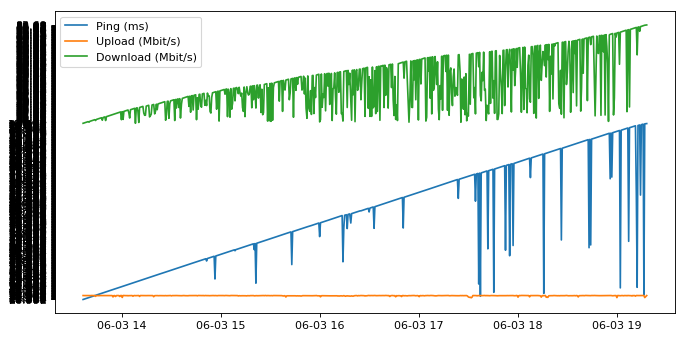

In [147]:
plt.figure(figsize=(10,5), dpi=80)

t = pd.to_datetime(df_clean['Time'])

plt.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
plt.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
plt.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

plt.legend()
plt.show()

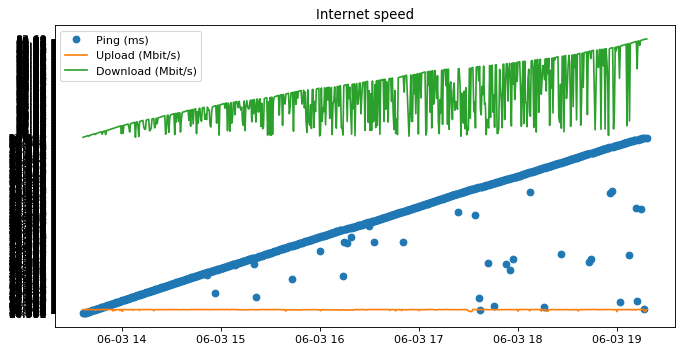

In [144]:
plt.figure(figsize=(10,5), dpi=80)

t = pd.to_datetime(df_clean['Time'])

plt.plot(t, df_clean['Ping (ms)'],'o', label='Ping (ms)')
plt.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
plt.plot(t, df_clean['Download (Mbit/s)'], label='Download (Mbit/s)')

plt.title('Internet speed')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5), dpi=80)

#najpogostejše vrednosti, razpršenost
plt.subplot(2,2,1)
plt.hist(df_clean['Ping (ms)'], 100)
plt.xlabel('Ping (ms)', fontsize=16)
plt.tick_params(labelsize=10)

plt.subplot(2,2,2)
plt.hist(df_clean['Upload (Mbit/s)'], 100)
plt.xlabel('Ping (ms)', fontsize=16)
plt.tick_params(labelsize=10)

plt.subplot(2,2,3)
plt.hist(df_clean['Download (Mbit/s)'], 100)
plt.xlabel('Ping (ms)', fontsize=16)
plt.tick_params(labelsize=10)

plt.show()

## Internet Meter Anomaly Detection 


**Create a Dataframe and modify the quantities**
#interaktivni grafi


In [ ]:
df_clean.head()

In [ ]:
df_rates = df_clean.copy()

In [ ]:
df_rates.drop(['Date', 'Time', 'Ping (ms)'], axis=, inplace=True)
lookup = {'Downloads (Mbit/s)': 'download_rate', 'Upload (Mbit/s)': 'upload_rate'}
df_rates.rename(columns=lookup, inplace=True)
ping_rate = 1. / df_clean['Ping (ms)']
ping_rate = 1000 * ping_rate
ping_rate

                    

In [4]:
lookup = {'Download (Mbit/s)': 'download_rate', 
          'Upload (Mbit/s)': 'upload_rate'}


**Vizualizacija podatkov**



In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact

In [ ]:
def f(x):
    return x**2

In [ ]:
interact(f, x=(0,100))

In [ ]:
def scatter_view(x,y,z,azim,elev):
    fig = plt.figure(figsize=(10,5), dpi=80)
    ax = Axes3D(fig)
    
    ax.scatter(x,y,z)
    ax.set_xlabel('D rate (Mbit/s)', fontsize=16)
    ax.set_ylabel('U rate (Mbit/s)', fontsize=16)
    ax.set_zlabel('P rate (1/s)', fontsize=16)
    
    ax.azim = azim
    ax.elev = elev

In [ ]:
xi = df_rates['download_rate']
yi = df_rates['upload_rate']
zi = df_rates['ping_rate']

interact(lambda azim, elev: scatter_view(xi, yi, zi, azim, elev), azim=(0,90), elev=(0,90))

plt.show()

**Euclidean Anomaly Detection**
